In [1]:
# importing the needed packages
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
##  Load the saved model
from keras.models import model_from_json
json_file = open('trained_models/model_3_50_50_1_5/model_1.json')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
autoencoder.load_weights('trained_models/model_3_50_50_1_5/model_1.h5')

In [3]:
# Show the model summary
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
__________

In [4]:
# path for reading the test data
test_path = '../data/processed/cseg_fault_dyke_fold_model_50_3/'

In [5]:
# Read test data and rearrange it
X_test = np.load(test_path + 'X_test.npy')
Y_test = np.load(test_path + 'Y_test.npy')
X_test1 = np.expand_dims(X_test, axis = 3)
Y_test1 = np.expand_dims(Y_test, axis = 3)

In [6]:
# Compute model predictions
Y_pred = autoencoder.predict(X_test1)

0.04 1.2805933092795971
0.04 1.0
0.023879986 0.99982196


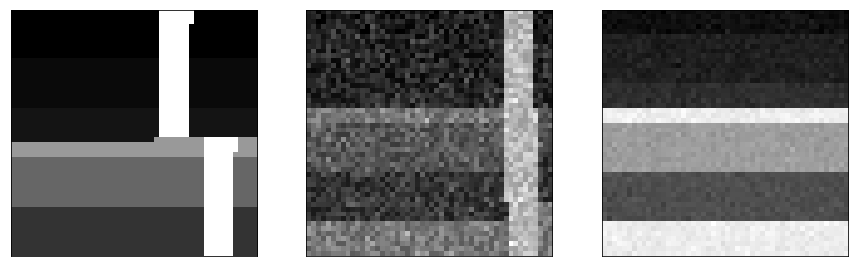

In [7]:
# Randomly visualizing a certain sample from test data
sample_index = 100

fig, axs = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs[0].imshow(X_test1[354, :, :, 0])
axs[1].imshow(X_test1[266, :, :, 0])
axs[2].imshow(X_test1[464, :, :, 0])

# Removing the ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

print(np.min(X_test1[sample_index, :, :, 0]), np.max(X_test1[sample_index, :, :, 0]))
print(np.min(Y_test1[sample_index, :, :, 0]), np.max(Y_test1[sample_index, :, :, 0]))
print(np.min(Y_pred[sample_index, :, :, 0]), np.max(Y_pred[sample_index, :, :, 0]))

In [14]:
# Test the results of autoencoder and results of different filtering methods
